<a href="https://colab.research.google.com/github/Maheswaripaidi/NDF---NOdeepfake/blob/main/Sindoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# Load the MobileNetV2 model (pre-trained on ImageNet)
model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load the MobileNetV2 model (pre-trained on ImageNet)
model = MobileNetV2(weights='imagenet')


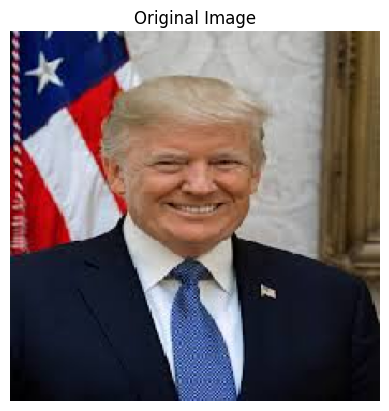

In [ ]:
# Function to load an image and preprocess it for the model
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to MobileNetV2 input size
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for MobileNetV2
    return img_array, img

# Example: Load an image (replace 'path_to_your_image.jpg' with your image path)
img_path = "/content/trum.jpeg" # Replace with the actual path to your image
img_array, original_img = load_image(img_path)

# Display the original image
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


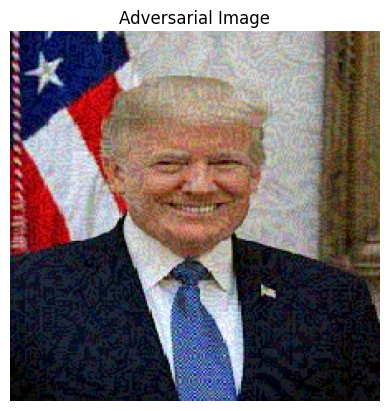

In [ ]:
# Function to generate adversarial noise using FGSM
def generate_adversarial_example(model, img, label, epsilon=0.1):
    # Convert image to tensor
    img_tensor = tf.convert_to_tensor(img)

    # Make the label tensor of shape (1,) instead of a scalar
    label_tensor = tf.convert_to_tensor([label])  # Wrap the label in a list to create a batch

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)  # Watch the image tensor
        prediction = model(img_tensor)  # Get model prediction
        loss = tf.keras.losses.sparse_categorical_crossentropy(label_tensor, prediction)

    # Get the gradient of the loss w.r.t the image
    gradient = tape.gradient(loss, img_tensor)

    # Get the sign of the gradient to create adversarial perturbation
    signed_grad = tf.sign(gradient)

    # Create adversarial image by adding the perturbation
    adversarial_img = img_tensor + epsilon * signed_grad
    adversarial_img = tf.clip_by_value(adversarial_img, -1, 1)  # Ensure pixel values stay in range

    return adversarial_img.numpy()

# Make prediction for the original image
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions[0])

# Generate adversarial example
adversarial_img = generate_adversarial_example(model, img_array, predicted_label)

# Convert tensor back to image
adversarial_img = np.squeeze(adversarial_img)  # Remove batch dimension
adversarial_img = (adversarial_img + 1) / 2  # Rescale pixel values to [0, 1]

# Display adversarial image
plt.imshow(adversarial_img)
plt.title("Adversarial Image")
plt.axis('off')
plt.show()


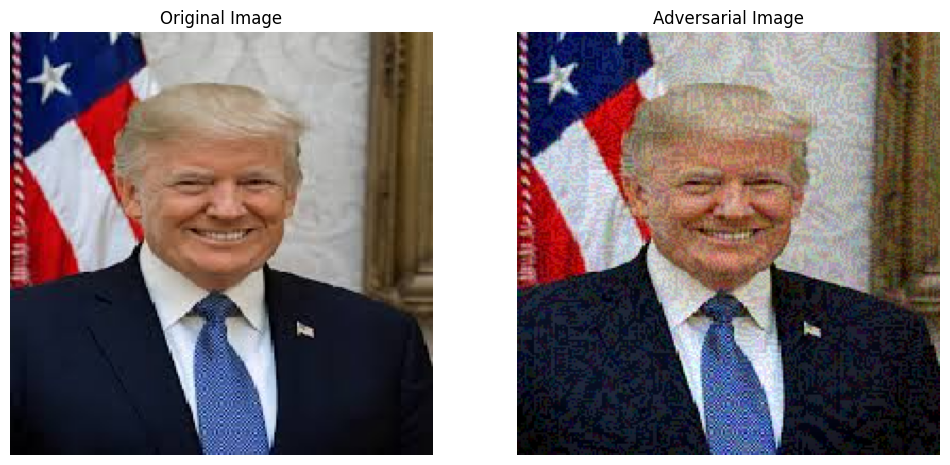

In [ ]:
# Display original and adversarial images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Adversarial Image
axes[1].imshow(adversarial_img)
axes[1].set_title("Adversarial Image")
axes[1].axis('off')

plt.show()

